In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging

In [21]:
# 1. Logging Setup
logging.basicConfig(filename='store_sales_analysis.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

logging.info('Loading the dataset...')

In [24]:
store_data = pd.read_csv(r'..\Data\store.csv')
sales_data = pd.read_csv(r'..\Data\train.csv')


C:\Users\eep\AppData\Local\Temp\ipykernel_576\57879938.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv(r'..\Data\train.csv')


In [26]:
# Data Cleaning
logging.info('Handling missing data...')

# Check for missing values in both datasets
missing_values_store = store_data.isnull().sum()
missing_values_sales = sales_data.isnull().sum()
logging.info(f"Missing values in store dataset:\n{missing_values_store}")
logging.info(f"Missing values in sales dataset:\n{missing_values_sales}")

# Handling missing values in store_data
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace=True)
store_data['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
store_data['CompetitionOpenSinceYear'].fillna(0, inplace=True)
store_data['Promo2SinceWeek'].fillna(0, inplace=True)
store_data['Promo2SinceYear'].fillna(0, inplace=True)
store_data['PromoInterval'].fillna('None', inplace=True)

C:\Users\eep\AppData\Local\Temp\ipykernel_576\306373808.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace=True)
C:\Users\eep\AppData\Local\Temp\ipykernel_576\306373808.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [27]:
# Merge store and sales data
merged_data = pd.merge(sales_data, store_data, on='Store')

# Convert 'Date' to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])




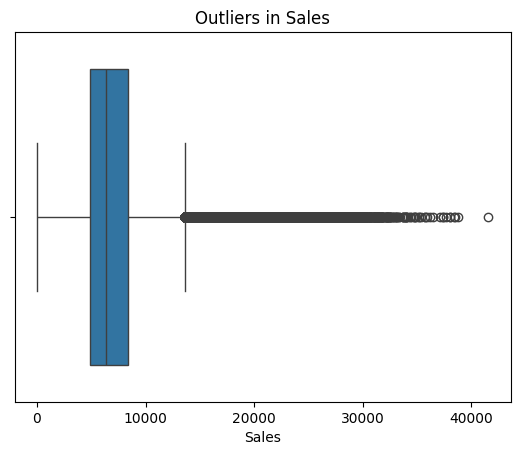

In [60]:
# Check for outliers in sales
logging.info('Checking for outliers in sales data...')
sns.boxplot(x=merged_data['Sales'])
plt.title('Outliers in Sales')
plt.show()

# Handling outliers: Remove sales = 0
merged_data = merged_data[merged_data['Sales'] > 0]



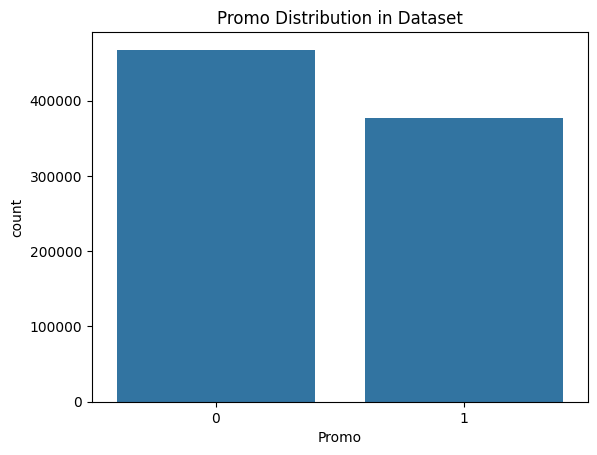

In [29]:
# Check for distribution in promotions
logging.info('Checking promotion distribution...')
sns.countplot(x='Promo', data=merged_data)
plt.title('Promo Distribution in Dataset')
plt.show()


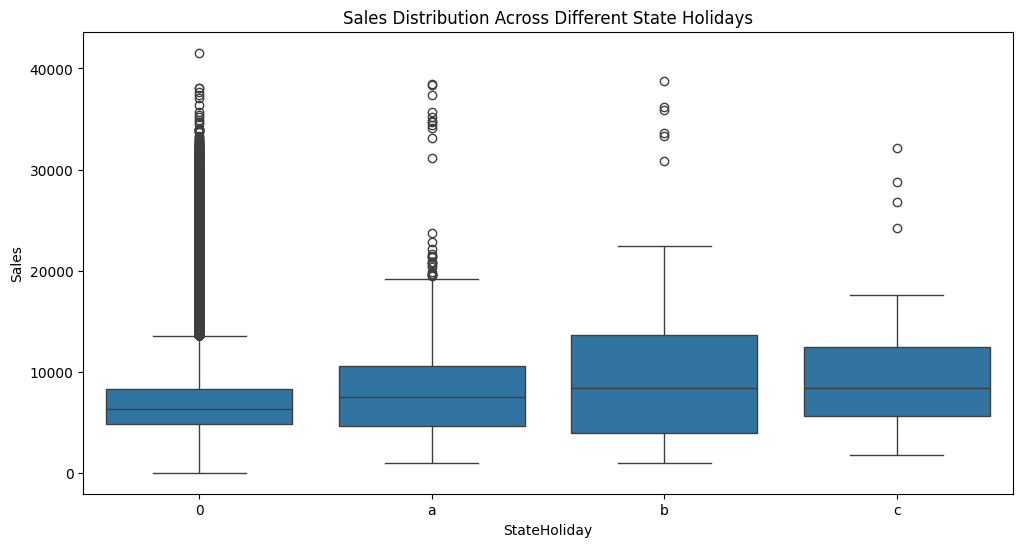

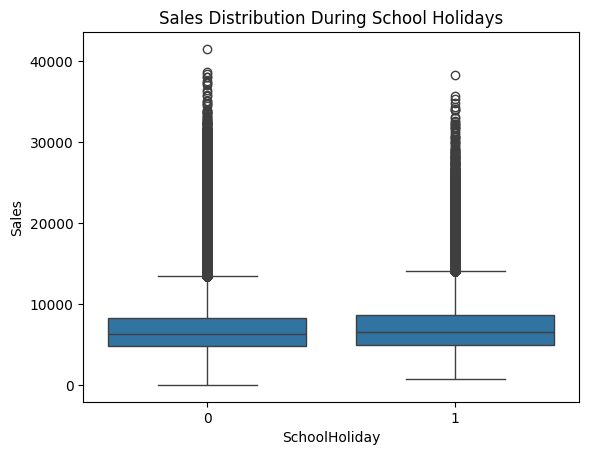

In [30]:

# Sales behavior before, during, and after holidays
logging.info('Analyzing sales behavior during holidays...')
plt.figure(figsize=(12, 6))
sns.boxplot(x='StateHoliday', y='Sales', data=merged_data)
plt.title('Sales Distribution Across Different State Holidays')
plt.show()

# Sales during school holidays
sns.boxplot(x='SchoolHoliday', y='Sales', data=merged_data)
plt.title('Sales Distribution During School Holidays')
plt.show()


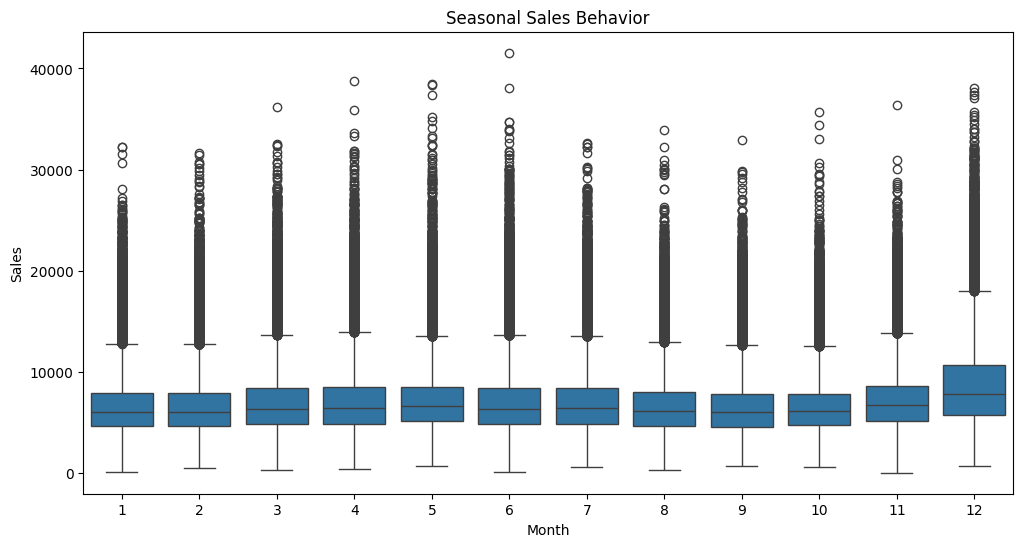

In [31]:

# Seasonal Behavior
merged_data['Month'] = merged_data['Date'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Sales', data=merged_data)
plt.title('Seasonal Sales Behavior')
plt.show()



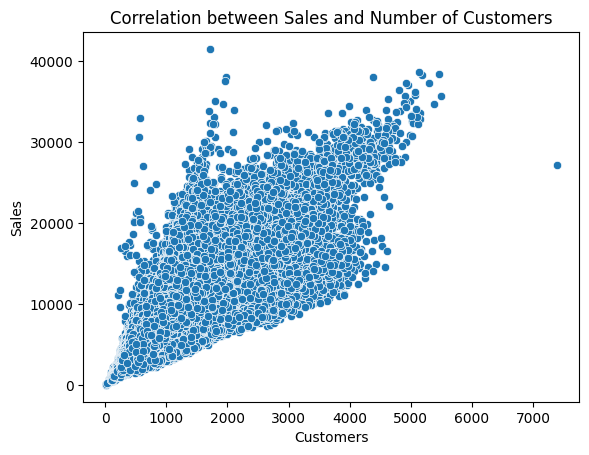

In [32]:
# Correlation between sales and number of customers
logging.info('Checking correlation between sales and customers...')
correlation = merged_data[['Sales', 'Customers']].corr()
logging.info(f"Correlation matrix:\n{correlation}")
sns.scatterplot(x='Customers', y='Sales', data=merged_data)
plt.title('Correlation between Sales and Number of Customers')
plt.show()



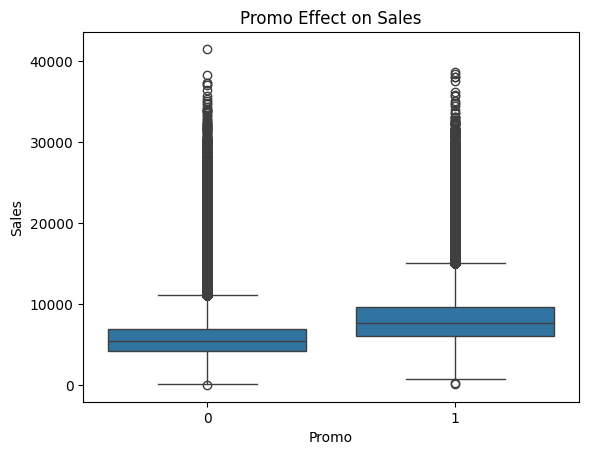

In [33]:
# Promo Effect on Sales
logging.info('Analyzing how promotions affect sales...')
sns.boxplot(x='Promo', y='Sales', data=merged_data)
plt.title('Promo Effect on Sales')
plt.show()



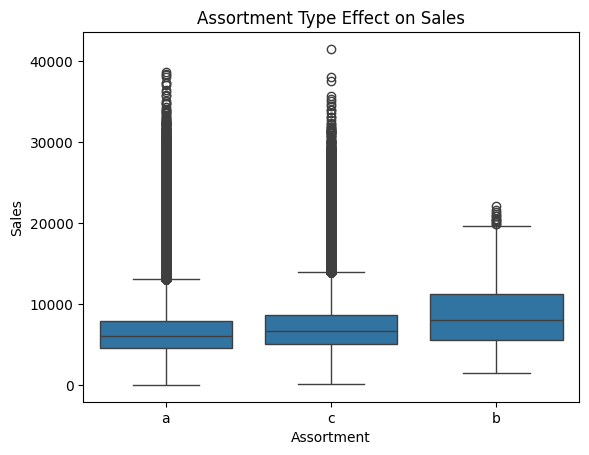

In [34]:
# Assortment Type and Sales
logging.info('Analyzing how assortment types affect sales...')
sns.boxplot(x='Assortment', y='Sales', data=merged_data)
plt.title('Assortment Type Effect on Sales')
plt.show()


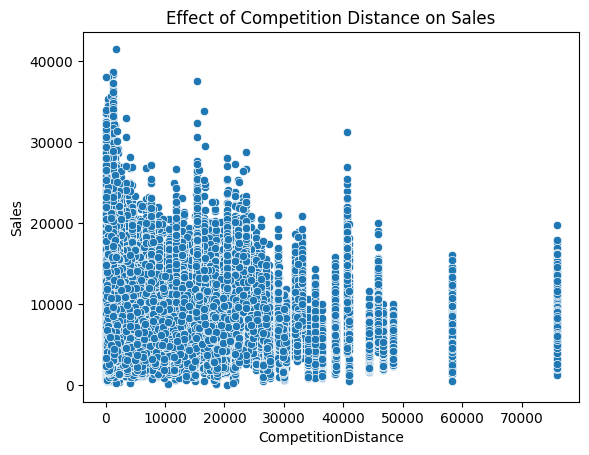

In [35]:

# Distance to Next Competitor and Sales
logging.info('Analyzing effect of competitor distance on sales...')
sns.scatterplot(x='CompetitionDistance', y='Sales', data=merged_data)
plt.title('Effect of Competition Distance on Sales')
plt.show()



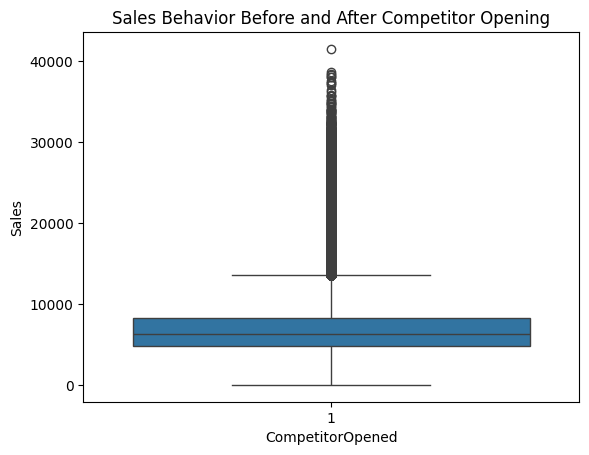

In [36]:
#  Competitor Reopening Effect
logging.info('Analyzing effect of competitor reopening on sales...')
merged_data['CompetitorOpened'] = np.where(merged_data['CompetitionDistance'].isna(), 0, 1)
sns.boxplot(x='CompetitorOpened', y='Sales', data=merged_data)
plt.title('Sales Behavior Before and After Competitor Opening')
plt.show()

logging.info('Exploratory Data Analysis Completed.')

In [46]:
# Check for missing values in 'Promo'
if merged_data['Promo'].isnull().sum() > 0:
    logging.warning(f"Missing values found in 'Promo': {merged_data['Promo'].isnull().sum()}")
    merged_data['Promo'].fillna(0, inplace=True)  # Fill missing promos if needed


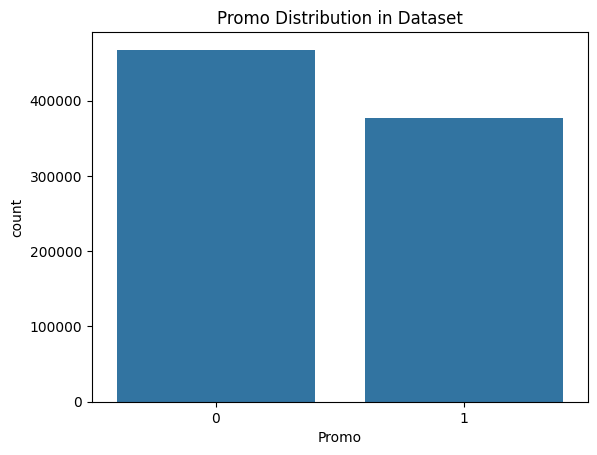

In [47]:
# Check for distribution in promotions
logging.info('Checking promotion distribution in dataset...')
sns.countplot(x='Promo', data=merged_data)
plt.title('Promo Distribution in Dataset')
plt.show()


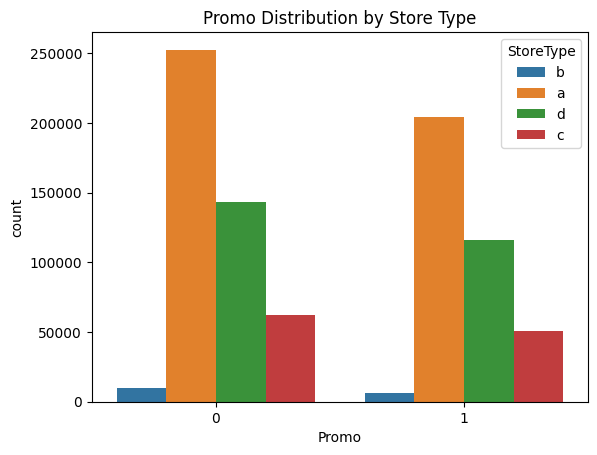

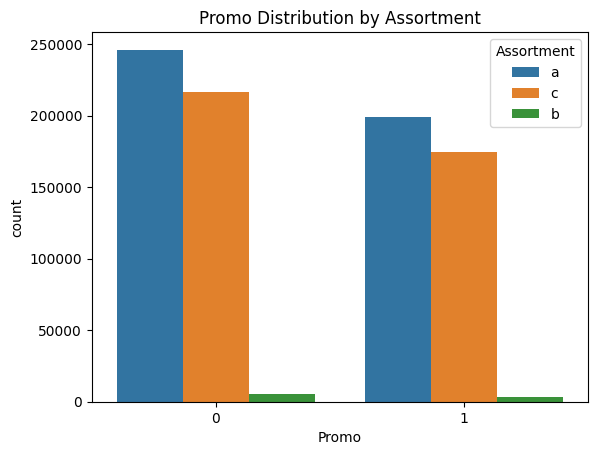

In [48]:
# Promo distribution across different store types
sns.countplot(x='Promo', hue='StoreType', data=merged_data)
plt.title('Promo Distribution by Store Type')
plt.show()

# Promo distribution across different assortment types
sns.countplot(x='Promo', hue='Assortment', data=merged_data)
plt.title('Promo Distribution by Assortment')
plt.show()


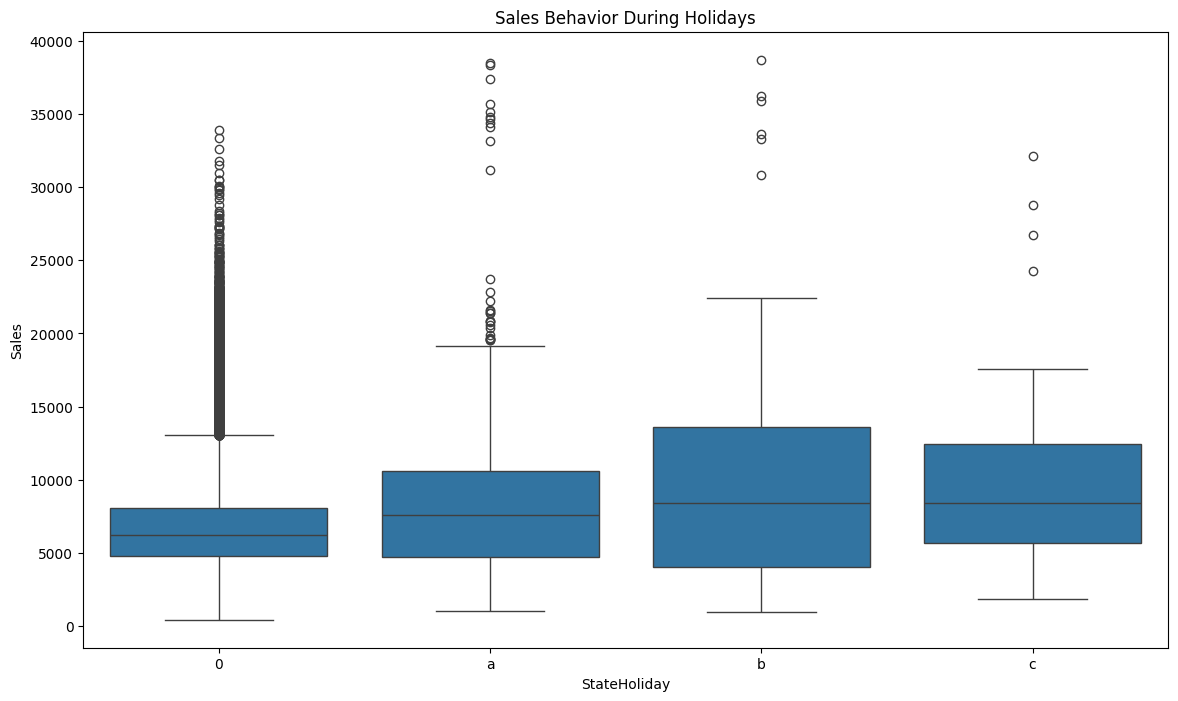

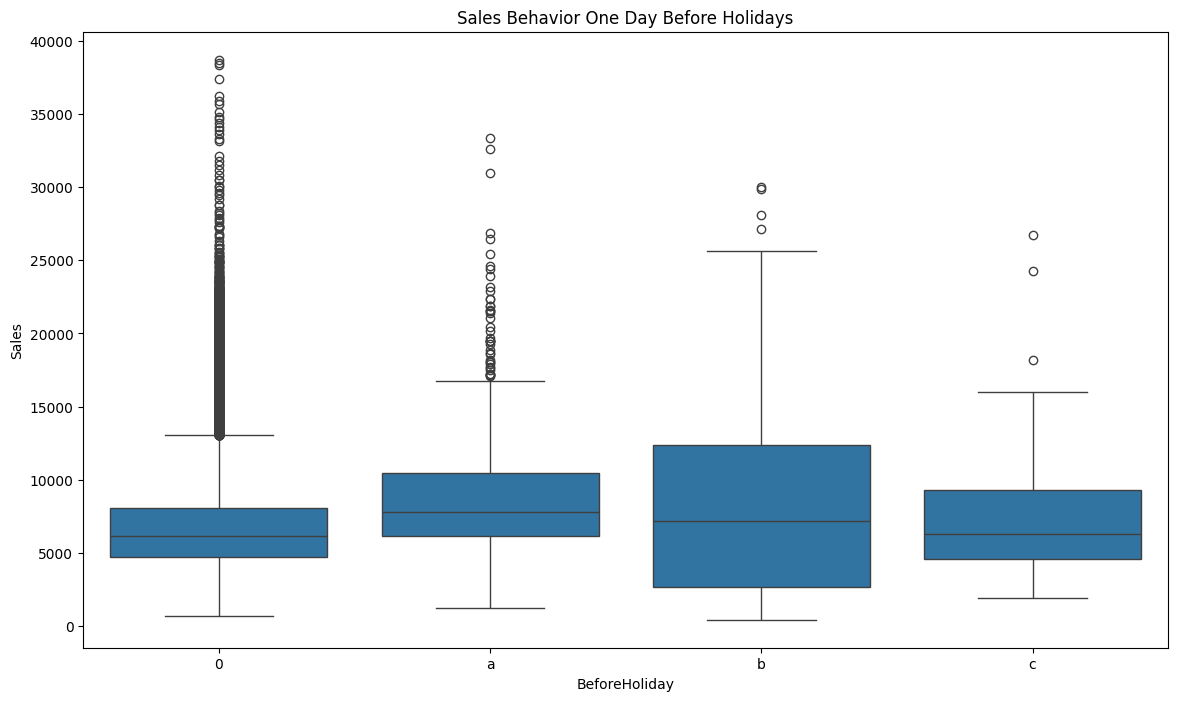

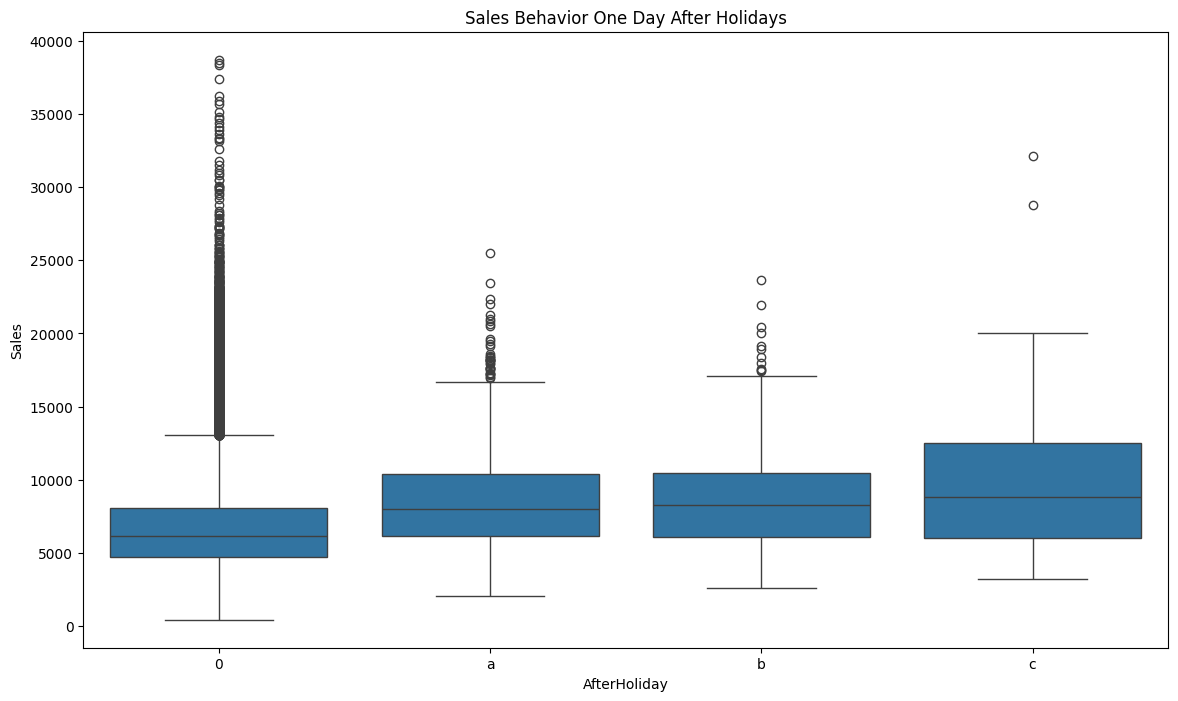

In [49]:
#Classifying Before, During, and After Holidays:
# Convert Date to datetime if not already done
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Sort by Date and Store for easier analysis
merged_data = merged_data.sort_values(by=['Store', 'Date'])

# Define 'BeforeHoliday' and 'AfterHoliday' features
merged_data['BeforeHoliday'] = merged_data['StateHoliday'].shift(-1).fillna('0')
merged_data['AfterHoliday'] = merged_data['StateHoliday'].shift(1).fillna('0')

# Filter data for relevant sales periods (Before, During, After)
before_during_after = merged_data[(merged_data['StateHoliday'] != '0') | 
                                  (merged_data['BeforeHoliday'] != '0') | 
                                  (merged_data['AfterHoliday'] != '0')]

# 2. Plotting Sales Behavior Before, During, and After Holidays
plt.figure(figsize=(14, 8))
sns.boxplot(x='StateHoliday', y='Sales', data=before_during_after)
plt.title('Sales Behavior During Holidays')
plt.show()

# Sales behavior one day before and after holidays
plt.figure(figsize=(14, 8))
sns.boxplot(x='BeforeHoliday', y='Sales', data=before_during_after)
plt.title('Sales Behavior One Day Before Holidays')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='AfterHoliday', y='Sales', data=before_during_after)
plt.title('Sales Behavior One Day After Holidays')
plt.show()


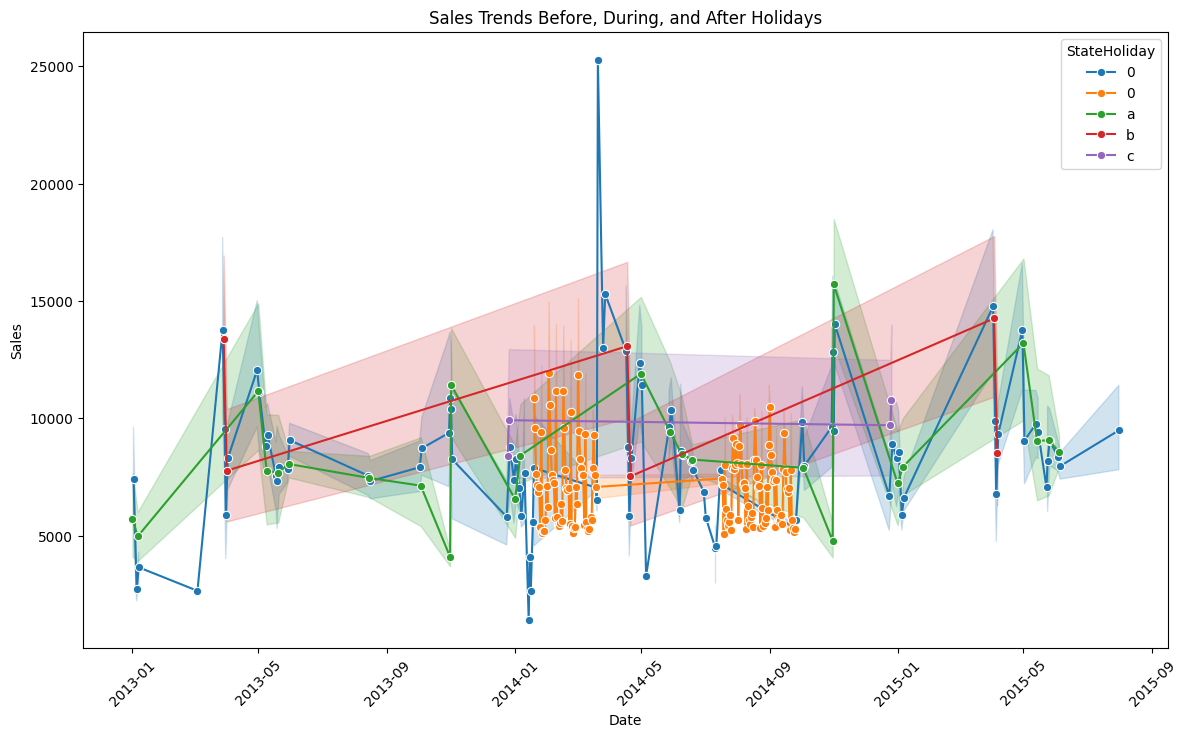

In [50]:
# Visualize Trends with Line Plots
# Sales trends before, during, and after holidays using a line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Sales', hue='StateHoliday', data=before_during_after, marker='o')
plt.title('Sales Trends Before, During, and After Holidays')
plt.xticks(rotation=45)
plt.show()


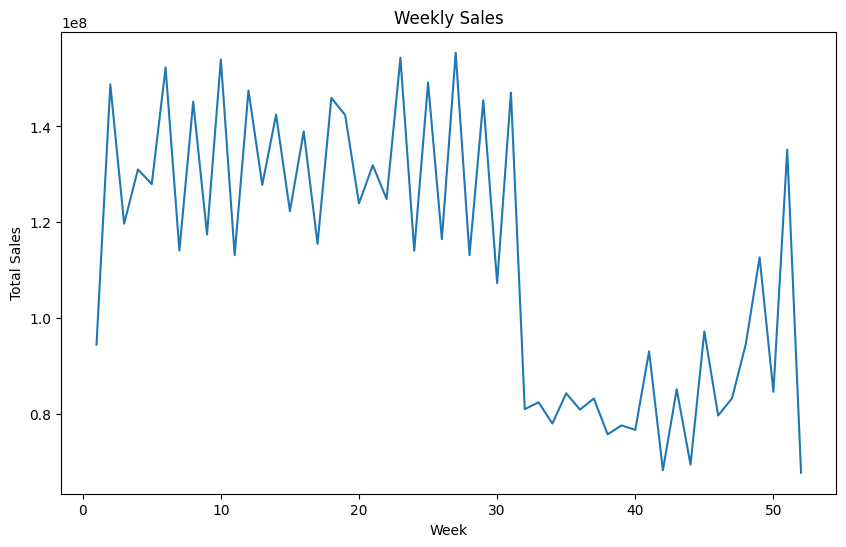

In [38]:
#Plotting Weekly Sales
# Ensure the date column is in datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Extract the week from the date
merged_data['Week'] = merged_data['Date'].dt.isocalendar().week

# Group by week and calculate the total sales for each week
weekly_sales = merged_data.groupby('Week')['Sales'].sum().reset_index()

# Plot weekly sales
plt.figure(figsize=(10,6))
sns.lineplot(data=weekly_sales, x='Week', y='Sales')
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.show()

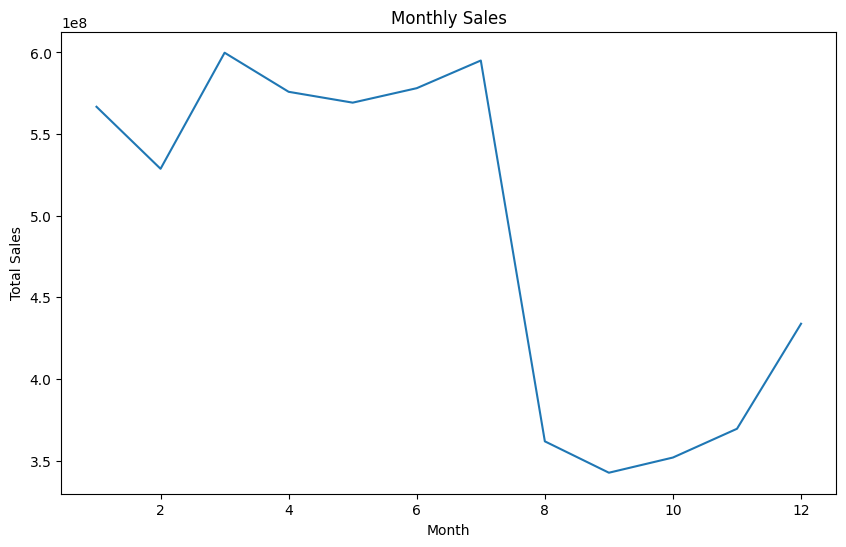

In [42]:
#Plotting Monthly Sales
# Extract the month from the date
merged_data['Month'] = merged_data['Date'].dt.month

# Group by month and calculate the total sales for each month
monthly_sales = merged_data.groupby('Month')['Sales'].sum().reset_index()

# Plot monthly sales
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

Explanation of Seasonal Decomposition:
Trend: Shows the overall direction (upwards, downwards) over time.
Seasonal: Recurring patterns (e.g., sales spikes during holiday seasons).
Residual: The remainder after removing trend and seasonality, representing noise or random fluctuations.

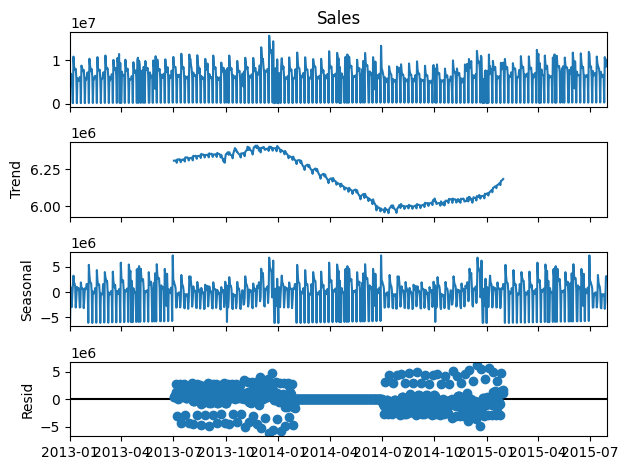

In [51]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the Date column as the index for time series analysis
merged_data.set_index('Date', inplace=True)

# Resample the sales data by day to handle any missing dates
daily_sales = merged_data['Sales'].resample('D').sum()

# Perform seasonal decomposition
decomposition = seasonal_decompose(daily_sales, model='additive', period=365)  # period = 365 for yearly seasonality

# Plot the decomposition
decomposition.plot()
plt.show()

Insights from the Plots:
ACF: Helps to identify the presence of significant correlations at specific lag values. A high autocorrelation at a particular lag indicates that previous values at that lag are influencing current values.
PACF: Isolates the direct relationship between the time series and its lag, without considering the influence of intermediate lags.
These plots are essential for determining the optimal number of lags (p, d, q) when building models like ARIMA or other time-series models.

In [62]:
# Load the datasets (assuming 'train.csv' and 'store.csv' were previously loaded)
store_data = pd.read_csv(r'..\Data\store.csv')
sales_data = pd.read_csv(r'..\Data\train.csv')

# Ensure 'Date' is correctly loaded and formatted in sales_data
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Now, merge the two datasets on 'Store' and make sure 'Date' is preserved
merged_data = pd.merge(sales_data, store_data, on='Store', how='left')

# Verify that 'Date' is now present in the merged_data
print(merged_data.columns)

# Continue with your time series analysis after fixing the merge
merged_data.set_index('Date', inplace=True)


C:\Users\eep\AppData\Local\Temp\ipykernel_576\525114619.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv(r'..\Data\train.csv')


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


C:\Users\eep\AppData\Local\Temp\ipykernel_576\1825822218.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv(r'..\Data\train.csv')
C:\Users\eep\AppData\Local\Temp\ipykernel_576\1825822218.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = merged_data.resample('M', on='Date')['Sales'].sum()


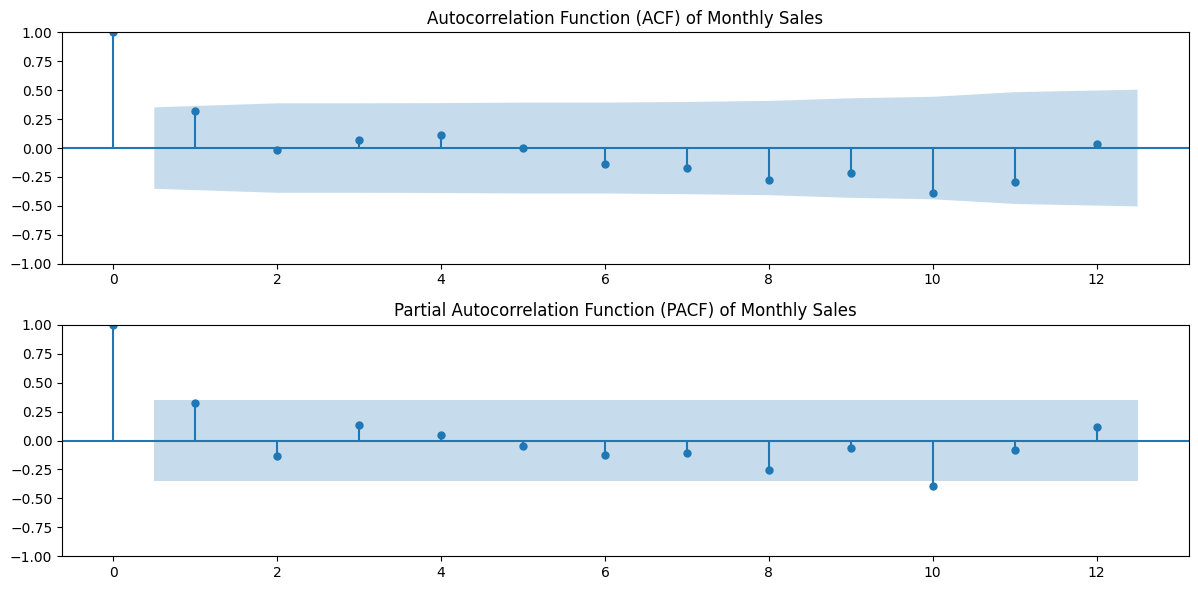

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Reload the sales data to ensure 'Date' column is present
sales_data = pd.read_csv(r'..\Data\train.csv')

# Check if 'Date' column is present and convert to datetime if needed
if 'Date' in sales_data.columns:
    sales_data['Date'] = pd.to_datetime(sales_data['Date'])
else:
    raise KeyError("The 'Date' column is missing from the dataset.")

# Merge sales and store data again to make sure 'Date' is in the merged dataset
merged_data = pd.merge(sales_data, store_data, on='Store')

# Resample the data to monthly frequency by summing the sales
monthly_sales = merged_data.resample('M', on='Date')['Sales'].sum()

# Plot ACF and PACF for the monthly sales data
plt.figure(figsize=(12, 6))

# Autocorrelation Function (ACF)
plt.subplot(211)
plot_acf(monthly_sales.dropna(), lags=12, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Monthly Sales')

# Partial Autocorrelation Function (PACF)
plt.subplot(212)
plot_pacf(monthly_sales.dropna(), lags=12, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of Monthly Sales')

plt.tight_layout()
plt.show()

In [70]:
print(monthly_sales.head())


Date
2013-01-31    180132207
2013-02-28    171534275
2013-03-31    201180369
2013-04-30    183431432
2013-05-31    185411063
Freq: ME, Name: Sales, dtype: int64


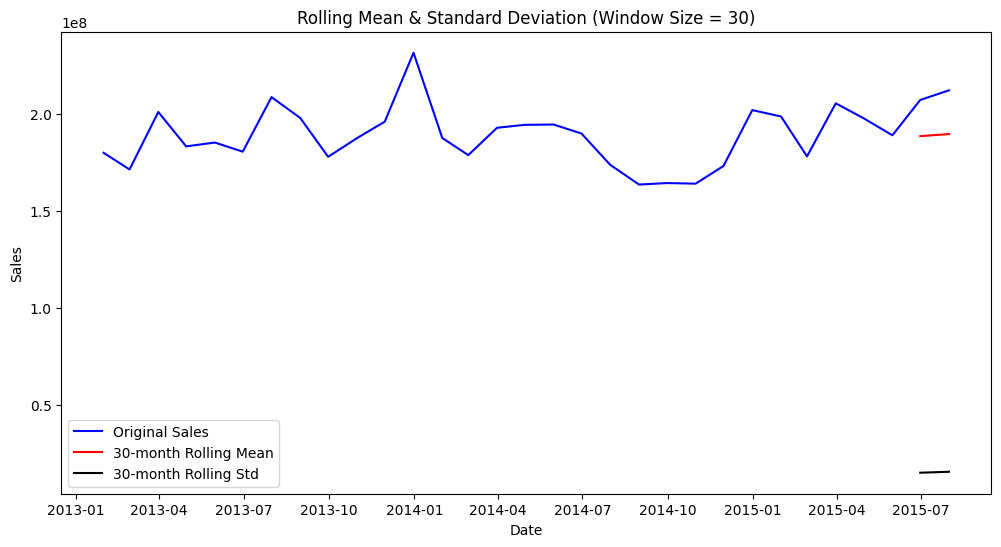

In [71]:
# Convert index to datetime if needed (you've confirmed that the index is already datetime)
# monthly_sales.index = pd.to_datetime(monthly_sales.index)

# Ensure 'Sales' column is numeric
monthly_sales = monthly_sales.to_frame()  # Convert Series to DataFrame if needed
monthly_sales['Sales'] = pd.to_numeric(monthly_sales['Sales'], errors='coerce')

# Choose a window size (e.g., 30 months for rolling statistics)
window_size = 30

# Calculate rolling mean and standard deviation
rolling_mean = monthly_sales['Sales'].rolling(window=window_size).mean()
rolling_std = monthly_sales['Sales'].rolling(window=window_size).std()

# Plot the rolling statistics
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], color='blue', label='Original Sales')
plt.plot(rolling_mean.index, rolling_mean, color='red', label=f'{window_size}-month Rolling Mean')
plt.plot(rolling_std.index, rolling_std, color='black', label=f'{window_size}-month Rolling Std')

# Add titles and labels
plt.title(f'Rolling Mean & Standard Deviation (Window Size = {window_size})')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()


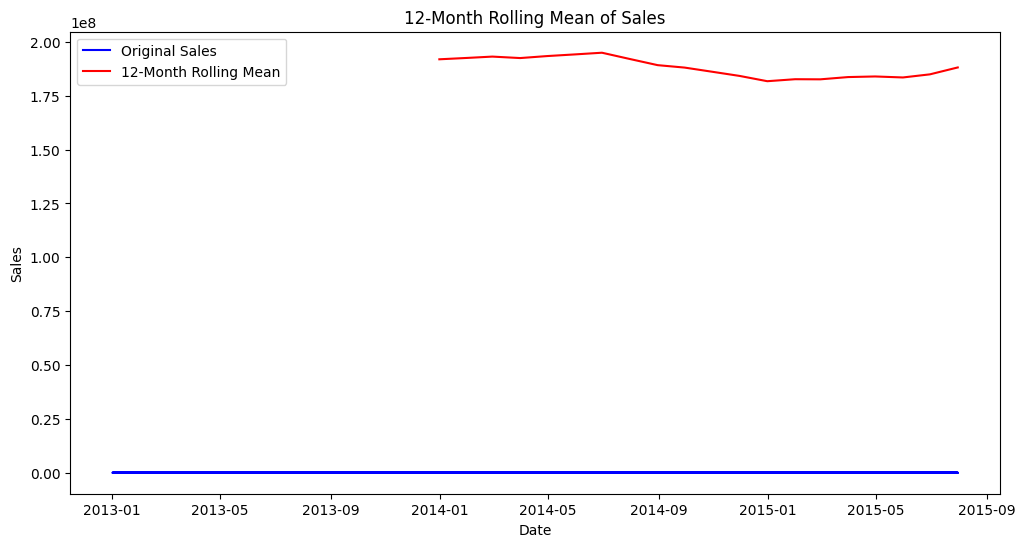

In [78]:
# Ensure 'Sales' column is numeric
monthly_sales['Sales'] = pd.to_numeric(monthly_sales['Sales'], errors='coerce')

# Choose a window size for 12 months
window_size = 12  # 12 months rolling window

# Calculate rolling mean
rolling_mean_12m = monthly_sales['Sales'].rolling(window=window_size).mean()

# Plot the original sales and 12-month rolling mean
plt.figure(figsize=(12,6))
plt.plot(df['Sales'], color='blue', label='Original Sales')
plt.plot(rolling_mean_12m, color='red', label='12-Month Rolling Mean')

# Add titles and labels
plt.title('12-Month Rolling Mean of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()




In [77]:
print(monthly_sales.head())

                Sales
Date                 
2013-01-31  180132207
2013-02-28  171534275
2013-03-31  201180369
2013-04-30  183431432
2013-05-31  185411063


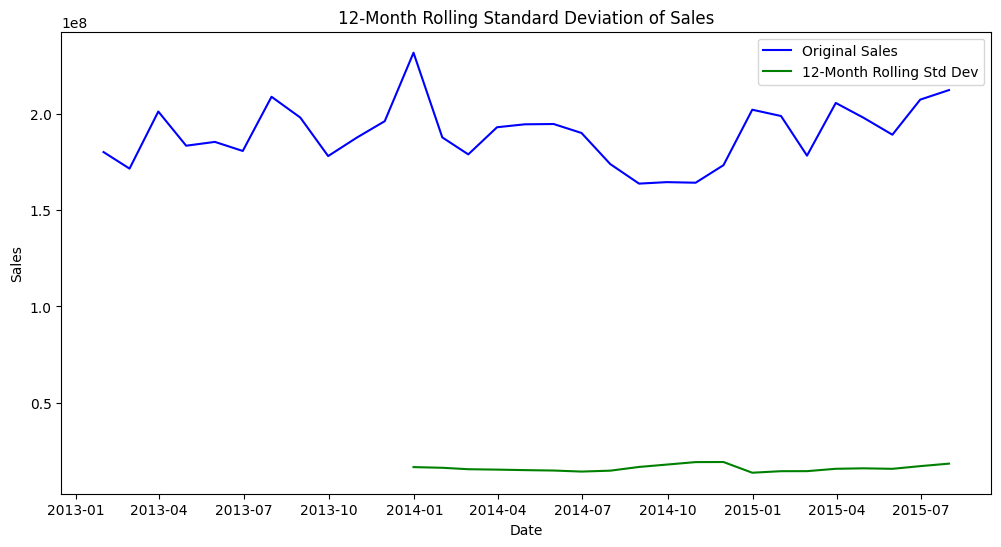

In [88]:
# Month Rolling Standard Deviation
# Ensure 'Sales' column is numeric
monthly_sales['Sales'] = pd.to_numeric(monthly_sales['Sales'], errors='coerce')

# Calculate the 12-month rolling standard deviation
monthly_sales['12M_Rolling_Std'] = monthly_sales['Sales'].rolling(window=12).std()

# Plot the original sales and 12-month rolling standard deviation
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Sales'], color='blue', label='Original Sales')
plt.plot(monthly_sales['12M_Rolling_Std'], color='green', label='12-Month Rolling Std Dev')

# Add titles and labels
plt.title('12-Month Rolling Standard Deviation of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()




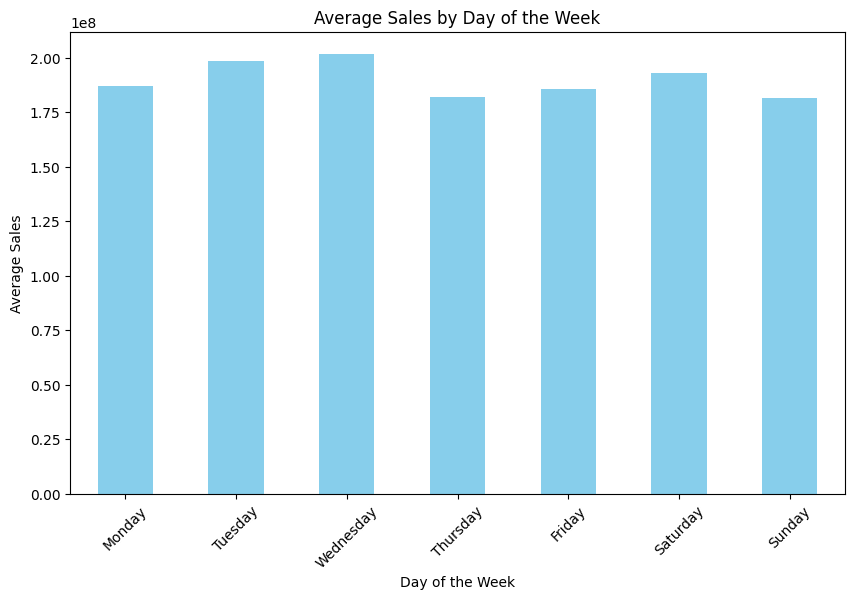

In [90]:
# Average Sales by Day of the Week
# # Make sure 'Date' is a datetime index
monthly_sales['Date'] = pd.to_datetime(monthly_sales.index)

# Extract day of the week from the 'Date' column
monthly_sales['Day_of_Week'] = monthly_sales['Date'].dt.day_name()

# Calculate average sales by day of the week
avg_sales_by_day = monthly_sales.groupby('Day_of_Week')['Sales'].mean()

# Plot the average sales by day of the week
plt.figure(figsize=(10, 6))
avg_sales_by_day = avg_sales_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
avg_sales_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()




In [91]:
#  Holiday Column

# Example list of holiday dates (Replace with your actual list of holidays)
holiday_dates = pd.to_datetime([
    '2013-01-01', '2013-12-25', '2013-07-04', # Add all relevant holiday dates here
])

# Ensure 'Date' column is in datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Create the 'Holiday' column
sales_data['Holiday'] = sales_data['Date'].isin(holiday_dates)

# Display the updated DataFrame to verify
print(sales_data.head())




   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  12M_Rolling_Std Day_of_Week  Holiday  
0              1              NaN      Friday    False  
1              1              NaN      Friday    False  
2              1              NaN      Friday    False  
3              1              NaN      Friday    False  
4              1              NaN      Friday    False  


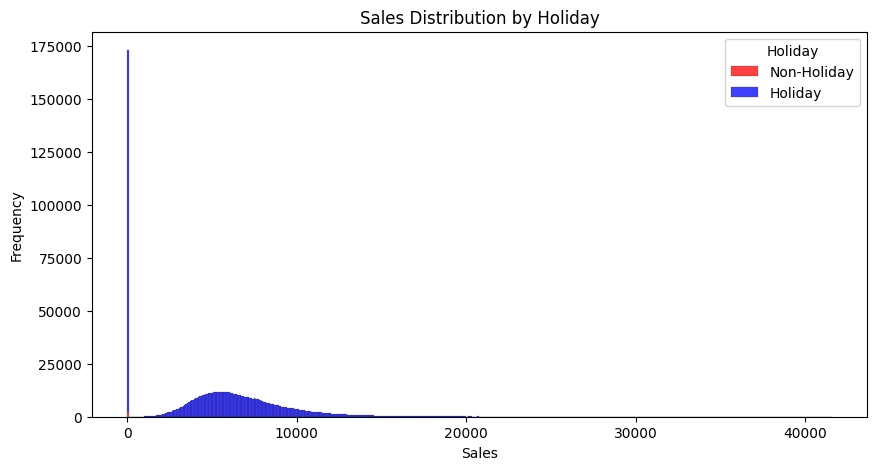

In [92]:
# Plot the distribution of sales for holidays vs non-holidays
plt.figure(figsize=(10, 5))
sns.histplot(data=sales_data, x='Sales', hue='Holiday', multiple='stack', palette={True: 'red', False: 'blue'})
plt.title('Sales Distribution by Holiday')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend(title='Holiday', labels=['Non-Holiday', 'Holiday'])
plt.show()



In [93]:

# Print summary statistics for 'Sales' and 'Customers'
print(sales_data[['Sales', 'Customers']].describe())



              Sales     Customers
count  1.017209e+06  1.017209e+06
mean   5.773819e+03  6.331459e+02
std    3.849926e+03  4.644117e+02
min    0.000000e+00  0.000000e+00
25%    3.727000e+03  4.050000e+02
50%    5.744000e+03  6.090000e+02
75%    7.856000e+03  8.370000e+02
max    4.155100e+04  7.388000e+03


In [94]:

# Holiday Effect
from scipy.stats import ttest_ind

# Assuming sales_data['Holiday'] is a boolean column indicating holidays

# Sales on holidays
holiday_sales = sales_data[sales_data['Holiday'] == True]['Sales']

# Sales on non-holidays
non_holiday_sales = sales_data[sales_data['Holiday'] == False]['Sales']

# Perform the t-test
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales)

# Print results
print('T-statistic:', t_stat)
print('P-value:', p_value)




T-statistic: -47.78717704943702
P-value: 0.0


In [100]:
# Effect Over Time

# Assuming 'Promo' is a binary indicator for promotions
promo_sales = sales_data[sales_data['Promo'] == 1]['Sales']
non_promo_sales = sales_data[sales_data['Promo'] == 0]['Sales']

t_stat_promo, p_value_promo = ttest_ind(promo_sales, non_promo_sales)
print('Promo Effect T-statistic:', t_stat_promo, 'P-value:', p_value_promo)






Promo Effect T-statistic: 511.54718673163774 P-value: 0.0


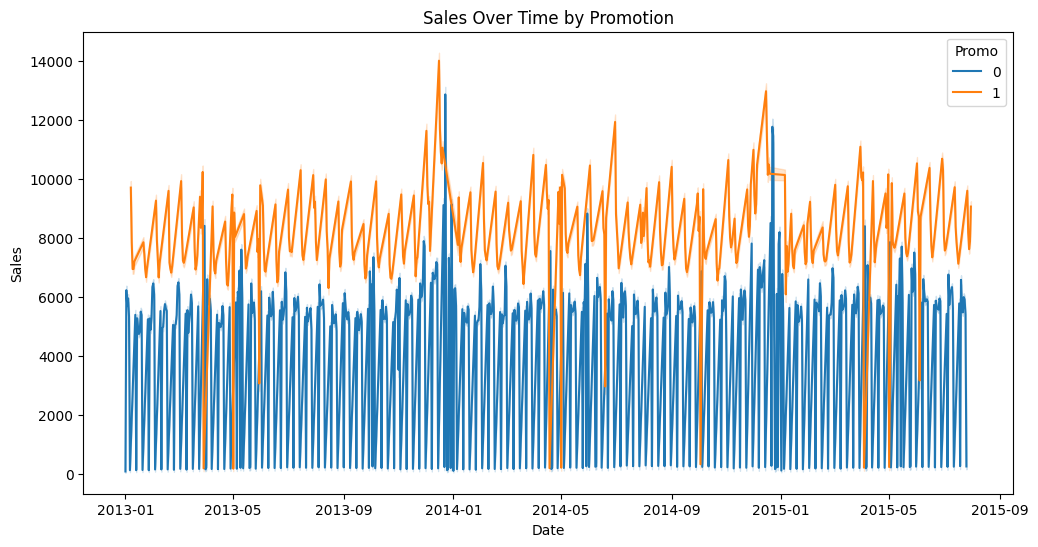

In [101]:
# Visualize the effect of promotions over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', hue='Promo', data=sales_data)
plt.title('Sales Over Time by Promotion')
plt.show()


In [97]:
# Display the column names of the DataFrame
print(sales_data.columns)


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', '12M_Rolling_Std', 'Day_of_Week',
       'Holiday'],
      dtype='object')


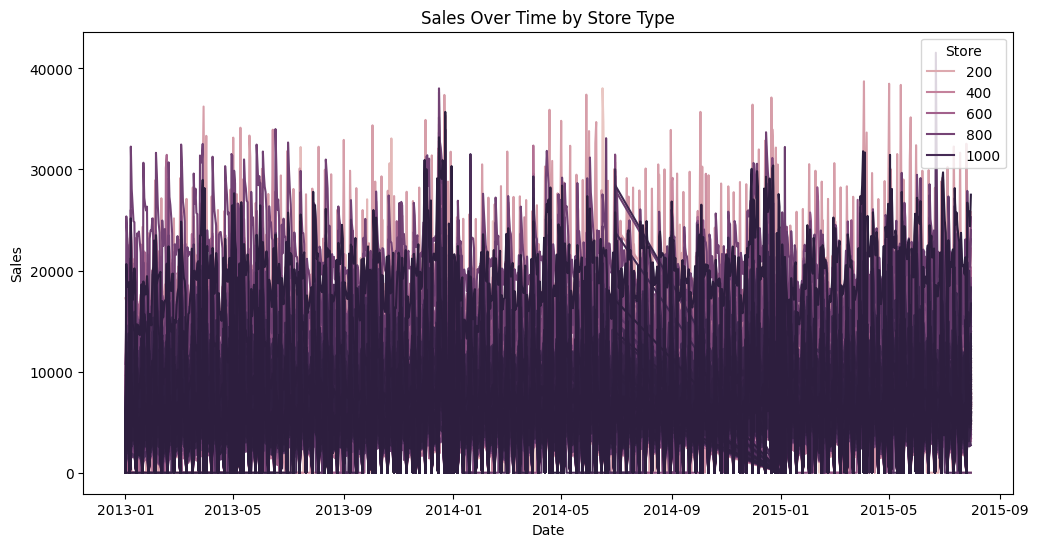

In [104]:
# Store needs to be visualized
if 'Store' in sales_data.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Sales', hue='Store', data=sales_data)
    plt.title('Sales Over Time by Store Type')
    plt.show()
else:
    print("Store column not found in sales_data DataFrame.")


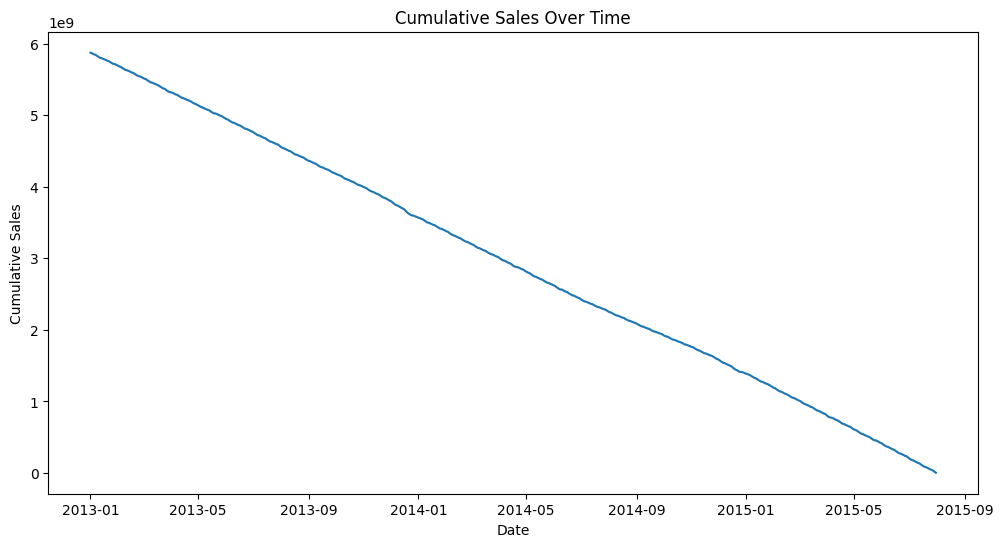

In [107]:

# Cumulative Sales Over Time
sales_data['Cumulative_Sales'] = sales_data['Sales'].cumsum()

# Plot cumulative sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Cumulative_Sales', data=sales_data)
plt.title('Cumulative Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.show()




              Sales  Customers     Promo   Holiday
Sales      1.000000   0.830217  0.364466  0.005409
Customers  0.830217   1.000000  0.184581  0.004620
Promo      0.364466   0.184581  1.000000  0.037285
Holiday    0.005409   0.004620  0.037285  1.000000


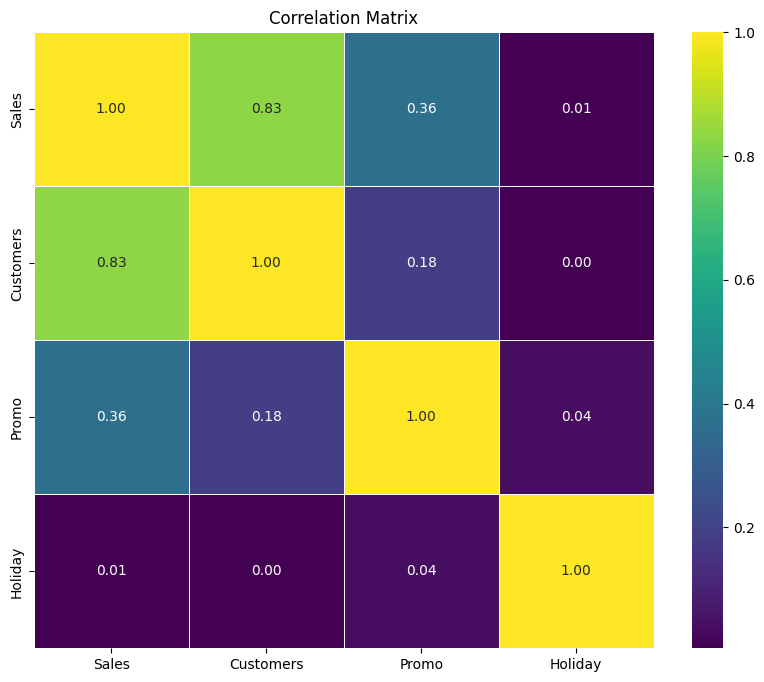

In [109]:
# Compute correlation matrix
correlation_matrix = sales_data[['Sales', 'Customers', 'Promo', 'Holiday']].corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


           Sales_Log  Customers     Promo   Holiday
Sales_Log   1.000000   0.493343  0.204796 -0.003910
Customers   0.493343   1.000000  0.184581  0.004620
Promo       0.204796   0.184581  1.000000  0.037285
Holiday    -0.003910   0.004620  0.037285  1.000000


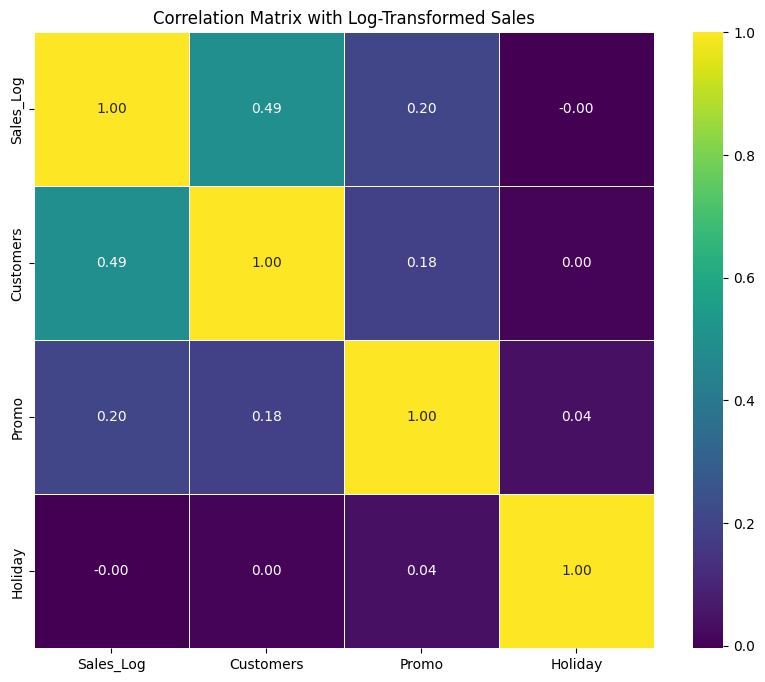

In [111]:
#Correlation Analysis After Transformation: If you plan to analyze correlations after the log transformation, update the correlation calculation:

# Compute correlation matrix including log-transformed Sales
correlation_matrix = sales_data[['Sales_Log', 'Customers', 'Promo', 'Holiday']].corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Log-Transformed Sales')
plt.show()


In [112]:
# Check for missing values in the Daily_Growth_Rate column
print(sales_data[['Date', 'Sales', 'Daily_Growth_Rate']].head(10))

         Date  Sales  Daily_Growth_Rate
11 2015-07-31   8959          -0.143253
12 2015-07-31   8821          -0.015404
13 2015-07-31   6544          -0.258134
14 2015-07-31   9191           0.404493
15 2015-07-31  10231           0.113154
16 2015-07-31   8430          -0.176034
17 2015-07-31  10071           0.194662
18 2015-07-31   8234          -0.182405
19 2015-07-31   9593           0.165047
20 2015-07-31   9515          -0.008131


In [113]:
# Check for duplicate dates
duplicate_dates = sales_data[sales_data.duplicated(subset=['Date'], keep=False)]
print(duplicate_dates)



         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
11          12          5 2015-07-31   8959        962     1      1   
12          13          5 2015-07-31   8821        568     1      1   
13          14          5 2015-07-31   6544        710     1      1   
14          15          5 2015-07-31   9191        766     1      1   
15          16          5 2015-07-31  10231        979     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016864    770          2 2013-01-01      0          0     0      0   
1017042    948          2 2013-01-01   4491       1039     1      0   
1017043    949          2 2013-01-01      0          0     0      0   
1017190   1097          2 2013-01-01   5961       1405     1      0   
1017191   1098          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  12M_Rolling_Std Day_of_Week  Holiday  \
11                 0              1      3313.853715      Friday    Fa

In [115]:
# Convert relevant columns to numeric, forcing errors to NaN (if needed)
sales_data['Sales'] = pd.to_numeric(sales_data['Sales'], errors='coerce')
sales_data['Customers'] = pd.to_numeric(sales_data['Customers'], errors='coerce')
sales_data['Open'] = pd.to_numeric(sales_data['Open'], errors='coerce')
sales_data['Promo'] = pd.to_numeric(sales_data['Promo'], errors='coerce')
sales_data['StateHoliday'] = pd.to_numeric(sales_data['StateHoliday'], errors='coerce')
sales_data['SchoolHoliday'] = pd.to_numeric(sales_data['SchoolHoliday'], errors='coerce')
sales_data['12M_Rolling_Std'] = pd.to_numeric(sales_data['12M_Rolling_Std'], errors='coerce')


In [117]:
# Aggregate sales data by date
daily_sales = sales_data.groupby('Date').agg({
    'Sales': 'sum',
    'Customers': 'sum',
    'Open': 'mean',
    'Promo': 'mean',
    'StateHoliday': 'mean',
    'SchoolHoliday': 'mean',
    '12M_Rolling_Std': 'mean',
    'Holiday': 'mean'
}).reset_index()


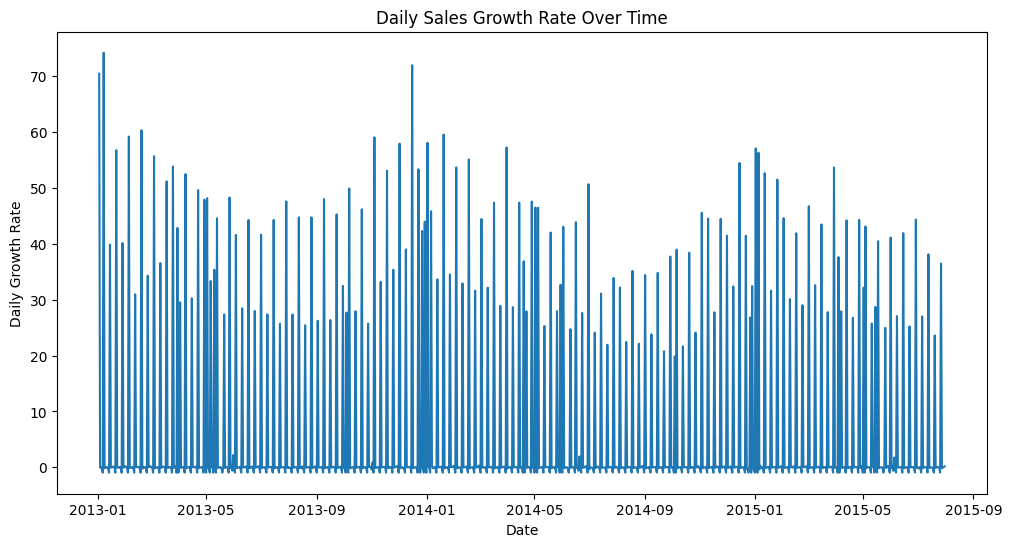

In [119]:
#  Visualize the Daily Growth Rate
# Sort data by date
daily_sales = daily_sales.sort_values('Date')

# Calculate daily growth rate
daily_sales['Daily_Growth_Rate'] = daily_sales['Sales'].pct_change()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Daily_Growth_Rate', data=daily_sales)
plt.title('Daily Sales Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Growth Rate')
plt.show()
